In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 as sql
import folium

%matplotlib inline

In [2]:
police_2013 = pd.read_csv('../data/Metro_Nashville_Davidson_County_Calls_For_Police_Service__2013_.csv')

In [3]:
police_2013.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
0,PD201300000001,01/01/2013 12:00:00 AM,20130000003,C,15,Community Policing Activity,P,PROGRESS,15,COMMUNITY POLICING,0,11TH AV N / CHARLOTTE AV,410C,C,11.0,4205,36.162,-86.791,"(36.162, -86.791)"
1,PD201300000004,01/01/2013 12:01:00 AM,20130000005,C,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,0,HOPEDALE DR / HAYWOOD LN,333C,S,33.0,8711,36.069,-86.716,"(36.069, -86.716)"
2,PD201300000005,01/01/2013 12:01:00 AM,20130000008,C,83,Shots Fired,P,PROGRESS,6,ASSISTED OTHER UNIT,0,10TH AV N / CHEATHAM PL,415C,C,15.0,4327,36.176,-86.797,"(36.176, -86.797)"
3,PD201300000007,01/01/2013 12:02:00 AM,0,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,0,OLDHAM ST / COWAN ST,415C,C,13.0,1989,36.175,-86.776,"(36.175, -86.776)"
4,PD201300000006,01/01/2013 12:02:00 AM,20130000006,C,43,Want Officer for Investigation / Assistance,P,PROGRESS,6,ASSISTED OTHER UNIT,600,SYLVAN ST,2W81,E,11.0,1043,36.168,-86.759,"(36.168, -86.759)"


In [4]:
police_2013.tail()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
1211705,PD201301344233,12/31/2013 11:57:00 PM,20131202596,NaN,43,Want Officer for Investigation / Assistance,P,PROGRESS,5,GONE ON ARRIVAL,600,ROTHWOOD AV,714C,M,11.0,0,34.153,-92.509,"(34.153, -92.509)"
1211706,PD201301344235,12/31/2013 11:57:00 PM,20131202597,NaN,96,Business Check,NaN,NaN,15,COMMUNITY POLICING,4600,NOLENSVILLE PKE,332C,S,33.0,0,34.153,-92.509,"(34.153, -92.509)"
1211707,PD201301344236,12/31/2013 11:57:00 PM,20140000052,NaN,44,Disorderly Person,P,PROGRESS,5,GONE ON ARRIVAL,3800,CENTRAL PKE,521C,H,21.0,9529,34.153,-92.509,"(34.153, -92.509)"
1211708,PD201301344237,12/31/2013 11:58:00 PM,20140000169,NaN,53,Holdup / Robbery,R,REPORT,1,M.P.D. REPORT COMPLED,1100,AIRPORT CENTER DR,515C,H,17.0,9411,34.153,-92.509,"(34.153, -92.509)"
1211709,PD201301344238,12/31/2013 11:59:00 PM,20140000006,NaN,83,Shots Fired,P,PROGRESS,5,GONE ON ARRIVAL,1700,SEIFRIED ST,6F85,N,11.0,4415,34.153,-92.509,"(34.153, -92.509)"


In [5]:
police_2013.shape

(1211710, 19)

In [6]:
police_2013.columns

Index(['Event Number', 'Call Received', 'Complaint Number', 'Shift', 'Tencode',
       'Tencode Description', 'Tencode Suffix', 'Tencode Suffix Description',
       'Disposition Code', 'Disposition Description', 'Block', 'Street Name',
       'Unit Dispatched', 'Sector', 'Zone', 'Reporting Area (RPA)', 'Latitude',
       'Longitude', 'Mapped Location'],
      dtype='object')

In [7]:
police_2013 = police_2013[['Event Number','Call Received','Complaint Number','Shift','Tencode','Tencode Description','Disposition Code','Disposition Description','Unit Dispatched','Sector','Zone','Latitude','Longitude']]

In [8]:
police_2013.shape

(1211710, 13)

In [10]:
police_2013.rename(columns = {'Event Number' : 'id', 'Call Received' : 'call_time', 'Complaint Number' : 'complaint_id', 'Shift' : 'shift', 'Tencode' : 'tencode', 'Tencode Description' : 'tencode_desc', 'Disposition Code' : 'disposition', 'Disposition Description' : 'disposition_desc', 'Unit Dispatched' : 'unit', 'Sector' : 'sector', 'Zone' : 'zone', 'Latitude' : 'lat', 'Longitude' : 'lng'}, inplace=True)

In [ ]:
# calls_placed_per_unit = police_2013.groupby('unit').size().reset_index(name='counts')


In [ ]:
# unit_most_calls = calls_placed_per_unit.max()
# print("The unit", unit_most_calls['unit'], "answered the most calls in 2013 which was", unit_most_calls['counts'],"calls.")

In [ ]:
# print("There were", calls_placed_per_unit[calls_placed_per_unit['counts'] > 1000].size, "units who answered more than 1000 calls in 2013.")

In [ ]:
# calls_per_tencode_desc = police_2013.groupby('tencode_desc').size().reset_index(name='counts')

In [ ]:
# calls_per_tencode_desc.max()['tencode_desc']
# print(calls_per_tencode_desc.max()['tencode_desc'], 'was the tencode description associated with the greatest number of calls in 2013.')

In [ ]:
# crime_counts_df = pd.DataFrame(calls_per_tencode_desc, columns = ['tencode_desc', 'counts']).rename(columns = {'tencode_desc' : 'crime'})

In [ ]:
# crime_counts_df.sort_values(by='counts').plot.barh(x='crime', y='counts')

In [ ]:
# crime_counts_df.nlargest(10, 'counts').sort_values(by='counts').plot.barh(x='crime', y='counts')

In [11]:
police_2013

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
0,PD201300000001,01/01/2013 12:00:00 AM,20130000003,C,15,Community Policing Activity,15,COMMUNITY POLICING,410C,C,11.0,36.162,-86.791
1,PD201300000004,01/01/2013 12:01:00 AM,20130000005,C,83,Shots Fired,11,DISREGARD / SIGNAL 9,333C,S,33.0,36.069,-86.716
2,PD201300000005,01/01/2013 12:01:00 AM,20130000008,C,83,Shots Fired,6,ASSISTED OTHER UNIT,415C,C,15.0,36.176,-86.797
3,PD201300000007,01/01/2013 12:02:00 AM,0,C,96,Business Check,12,LOCATION/BUILDING SECURE,415C,C,13.0,36.175,-86.776
4,PD201300000006,01/01/2013 12:02:00 AM,20130000006,C,43,Want Officer for Investigation / Assistance,6,ASSISTED OTHER UNIT,2W81,E,11.0,36.168,-86.759
5,PD201300000008,01/01/2013 12:02:00 AM,0,C,93,Traffic Violation,6,ASSISTED OTHER UNIT,6F61,N,13.0,36.171,-86.812
6,PD201300000009,01/01/2013 12:02:00 AM,20130000009,C,44,Disorderly Person,11,DISREGARD / SIGNAL 9,6F61,N,13.0,36.176,-86.804
7,PD201300000011,01/01/2013 12:03:00 AM,20130000013,C,83,Shots Fired,4,ASSISTED CITIZEN,621C,N,21.0,36.222,-86.801
8,PD201300000012,01/01/2013 12:04:00 AM,20130000012,C,43,Want Officer for Investigation / Assistance,11,DISREGARD / SIGNAL 9,235C,E,35.0,36.213,-86.723
9,PD201300000013,01/01/2013 12:04:00 AM,20130000019,C,83,Shots Fired,9,SUBJECT WARNED,115C,W,19.0,36.148,-86.830


In [12]:
police_2013.unit.value_counts().head(1)

423C    6816
Name: unit, dtype: int64

In [13]:
sum(police_2013.unit.value_counts() > 1000)

365

In [14]:
police_2013.tencode.value_counts().head(1)

93    388850
Name: tencode, dtype: int64

In [15]:
police_2013.tail()

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
1211705,PD201301344233,12/31/2013 11:57:00 PM,20131202596,NaN,43,Want Officer for Investigation / Assistance,5,GONE ON ARRIVAL,714C,M,11.0,34.153,-92.509
1211706,PD201301344235,12/31/2013 11:57:00 PM,20131202597,NaN,96,Business Check,15,COMMUNITY POLICING,332C,S,33.0,34.153,-92.509
1211707,PD201301344236,12/31/2013 11:57:00 PM,20140000052,NaN,44,Disorderly Person,5,GONE ON ARRIVAL,521C,H,21.0,34.153,-92.509
1211708,PD201301344237,12/31/2013 11:58:00 PM,20140000169,NaN,53,Holdup / Robbery,1,M.P.D. REPORT COMPLED,515C,H,17.0,34.153,-92.509
1211709,PD201301344238,12/31/2013 11:59:00 PM,20140000006,NaN,83,Shots Fired,5,GONE ON ARRIVAL,6F85,N,11.0,34.153,-92.509


In [16]:
crime_counts_2013 = police_2013.tencode_desc.value_counts().to_frame()
crime_counts_2013 = crime_counts_2013.reset_index()
crime_counts_2013.columns = ['crime', 'count']

<BarContainer object of 10 artists>

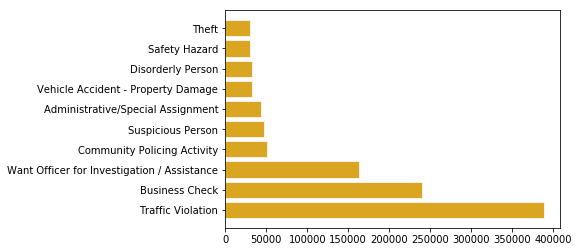

In [17]:
plt.barh('crime', 'count', data=crime_counts_2013[0:10], color='goldenrod', edgecolor='linen')

## Police 2018

In [18]:
police_2018 = pd.read_csv('../data/Metro_Nashville_Davidson_County_Calls_For_Police_Service__2018_.csv')

In [19]:
police_2018.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
0,PD201800000002,01/01/2018 12:00:00 AM,20180000002,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,0.0,3RD AV N & JEFFERSON ST,7F62,C,13,4311.0,36.175,-86.785,"(36.175, -86.785)"
1,PD201800000003,01/01/2018 12:00:00 AM,20180000003,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,2300.0,8TH AV S,821C,MT,23,6929.0,36.127,-86.778,"(36.127, -86.778)"
2,PD201800000004,01/01/2018 12:00:00 AM,20180000004,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,2800.0,NOLENSVILLE PKE,311C,S,13,8315.0,36.113,-86.746,"(36.113, -86.746)"
3,PD201800000005,01/01/2018 12:00:00 AM,20180000068,C,83,Shots Fired,P,PROGRESS,10,NO RESPONSE,0.0,12TH AV N & JACKSON ST,613C,N,15,5427.0,36.169,-86.798,"(36.169, -86.798)"
4,PD201800000006,01/01/2018 12:01:00 AM,20180000006,C,93,Traffic Violation,NaN,NaN,9,SUBJECT WARNED,0.0,GALLATIN AV & STRATTON AV,5153,E,13,1937.0,36.183,-86.749,"(36.183, -86.749)"


In [20]:
police_2018.tail()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
747318,PD201800927775,09/20/2018 05:15:56 AM,20180802455,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,700.0,RUSSELL ST,211C,E,11,1119.0,36.172,-86.759,"(36.172, -86.759)"
747319,PD201800927776,09/20/2018 05:16:23 AM,20180802456,C,93,Traffic Violation,NaN,NaN,9,SUBJECT WARNED,0.0,45TH AV N & ALABAMA AV,111C,W,11,5201.0,36.153,-86.841,"(36.153, -86.841)"
747320,PD201800931267,09/21/2018 03:10:02 AM,20180805542,C,93,Traffic Violation,NaN,NaN,9,SUBJECT WARNED,0.0,CLIFTON AV & 34TH AV N,113C,W,11,4579.0,36.159,-86.827,"(36.159, -86.827)"
747321,PD201800931274,09/21/2018 03:13:24 AM,20180805550,C,96,Business Check,NaN,NaN,15,COMMUNITY POLICING,300.0,BROADWAY,425C,C,21,4093.0,36.161,-86.777,"(36.161, -86.777)"
747322,PD201800931293,09/21/2018 03:26:56 AM,20180805567,C,96,Business Check,NaN,NaN,11,DISREGARD / SIGNAL 9,1300.0,ANTIOCH PKE,3F24,NaN,,0.0,34.153,-92.509,"(34.153, -92.509)"


In [23]:
police_2018.shape

(747323, 13)

4. Keep just these 13 columns: 

In [22]:
police_2018 = police_2018[['Event Number','Call Received','Complaint Number','Shift','Tencode','Tencode Description','Disposition Code','Disposition Description','Unit Dispatched','Sector','Zone','Latitude','Longitude']]

5.	Rename the columns above:

In [24]:
police_2018.rename(columns = {'Event Number' : 'id', 'Call Received' : 'call_time', 'Complaint Number' : 'complaint_id', 'Shift' : 'shift', 'Tencode' : 'tencode', 'Tencode Description' : 'tencode_desc', 'Disposition Code' : 'disposition', 'Disposition Description' : 'disposition_desc', 'Unit Dispatched' : 'unit', 'Sector' : 'sector', 'Zone' : 'zone', 'Latitude' : 'lat', 'Longitude' : 'lng'}, inplace=True)

6. Which unit answered the most calls in 2018? How many calls did they answer?

In [26]:
police_2018.unit.value_counts().head(1)

125C    6200
Name: unit, dtype: int64

7. How many units answered more than 1000 calls in 2018?

In [27]:
sum(police_2018.unit.value_counts() > 1000)

271

8. What tencode description is associated with the greatest number of calls in 2018?

In [28]:
police_2018.tencode.value_counts().head(1)

96    156142
Name: tencode, dtype: int64

9.	Create a data frame from the tencode description value counts. It should have two columns called ‘crime’ and ‘count’.

In [29]:
crime_counts_2018 = police_2018.tencode_desc.value_counts().to_frame()
crime_counts_2018 = crime_counts_2018.reset_index()
crime_counts_2018.columns = ['crime', 'count']

In [30]:
crime_counts_2018.head()

,crime,count
0,Business Check,156142
1,Traffic Violation,143257
2,Want Officer for Investigation / Assistance,126718
3,Administrative/Special Assignment,41765
4,Community Policing Activity,34511


10.	Make a horizontal barplot of the crime counts.

<BarContainer object of 10 artists>

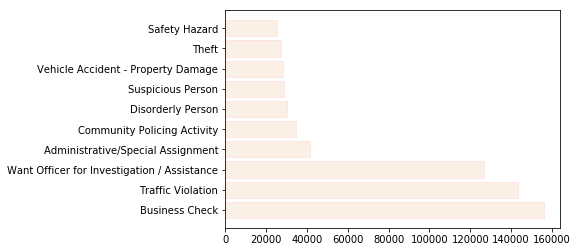

In [31]:
plt.barh('crime', 'count', data=crime_counts_2018[0:10], color='linen', edgecolor='mistyrose')

12.	Since the 2018 data is incomplete, find the latest date for this dataset.  So that comparisons are commensurate, remove rows from the 2013 data that are later than the latest month and day in the 2018 data.

In [32]:
police_2013.tail()

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
1211705,PD201301344233,12/31/2013 11:57:00 PM,20131202596,NaN,43,Want Officer for Investigation / Assistance,5,GONE ON ARRIVAL,714C,M,11.0,34.153,-92.509
1211706,PD201301344235,12/31/2013 11:57:00 PM,20131202597,NaN,96,Business Check,15,COMMUNITY POLICING,332C,S,33.0,34.153,-92.509
1211707,PD201301344236,12/31/2013 11:57:00 PM,20140000052,NaN,44,Disorderly Person,5,GONE ON ARRIVAL,521C,H,21.0,34.153,-92.509
1211708,PD201301344237,12/31/2013 11:58:00 PM,20140000169,NaN,53,Holdup / Robbery,1,M.P.D. REPORT COMPLED,515C,H,17.0,34.153,-92.509
1211709,PD201301344238,12/31/2013 11:59:00 PM,20140000006,NaN,83,Shots Fired,5,GONE ON ARRIVAL,6F85,N,11.0,34.153,-92.509


In [33]:
police_2013['call_time'] = pd.to_datetime(police_2013['call_time'])

In [43]:
police_2018['call_time'] = pd.to_datetime(police_2018['call_time'])

In [44]:
police_2013 = police_2013.truncate(after=('9/22/2013'))

13.	Create subsets of the 2013 and 2018 police call data that includes these five tencodes:
•	Holdup / Robbery
•	Bank Robbery
•	Burglary – Residence
•	Burglary - Non-Residence
•	Theft

In [45]:
crime_subset_rows = ['Holdup / Robbery', 'Bank Robbery', 'Burglary - Residence', 'Burglary - Non-Residence', 'Theft']


In [46]:
police_2013_subset = police_2013.loc[police_2013['tencode_desc'].isin(crime_subset_rows)]
police_2013_subset

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
21,PD201300000031,2013-01-01 00:09:00,20130000057,C,70,Burglary - Residence,13,FALSE CALL,137C,W,37.0,36.056,-86.936
24,PD201300000034,2013-01-01 00:10:00,20130000030,C,71,Burglary - Non-Residence,4,ASSISTED CITIZEN,VANDY,S,21.0,36.105,-86.762
27,PD201300000038,2013-01-01 00:10:00,20130000124,C,70,Burglary - Residence,12,LOCATION/BUILDING SECURE,7F80,M,23.0,36.241,-86.735
78,PD201300000107,2013-01-01 00:30:00,0,C,50,Theft,11,DISREGARD / SIGNAL 9,NaN,C,25.0,36.160,-86.775
79,PD201300000108,2013-01-01 00:30:00,20130000067,C,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,311C,S,21.0,36.084,-86.748
87,PD201300000117,2013-01-01 00:32:00,20130000154,C,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,321C,S,25.0,36.046,-86.752
190,PD201300000239,2013-01-01 01:10:00,20130000167,C,71,Burglary - Non-Residence,11,DISREGARD / SIGNAL 9,421C,C,25.0,36.155,-86.764
200,PD201300000251,2013-01-01 01:12:00,20130000230,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,321C,S,11.0,36.127,-86.737
228,PD201300000284,2013-01-01 01:23:00,0,C,71,Burglary - Non-Residence,11,DISREGARD / SIGNAL 9,NaN,M,11.0,36.249,-86.720
232,PD201300000289,2013-01-01 01:24:00,20130000197,C,71,Burglary - Non-Residence,11,DISREGARD / SIGNAL 9,235C,M,11.0,36.249,-86.720


In [47]:
police_2018_subset = police_2018.loc[police_2018['tencode_desc'].isin(crime_subset_rows)]
police_2018_subset

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
29,PD201800000032,2018-01-01 00:06:00,20180000124,C,50,Theft,5,GONE ON ARRIVAL,811C,MT,13,36.150,-86.813
43,PD201800000048,2018-01-01 00:08:00,20180000351,C,70,Burglary - Residence,10,NO RESPONSE,715C,M,23,36.269,-86.719
51,PD201800000058,2018-01-01 00:12:00,20180000134,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,517C,H,17,36.146,-86.662
58,PD201800000066,2018-01-01 00:13:00,0,C,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,NaN,M,25,36.279,-86.790
87,PD201800000097,2018-01-01 00:20:00,20180000126,C,70,Burglary - Residence,4,ASSISTED CITIZEN,617C,N,13,36.180,-86.816
95,PD201800000107,2018-01-01 00:23:00,20180000087,C,50,Theft,1,M.P.D. REPORT COMPLED,515C,NaN,NaN,NaN,NaN
109,PD201800000127,2018-01-01 00:28:00,20180000077,C,71,Burglary - Non-Residence,13,FALSE CALL,825C,MT,25,36.119,-86.753
117,PD201800000136,2018-01-01 00:32:00,20180000089,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,311C,S,13,36.094,-86.735
118,PD201800000137,2018-01-01 00:33:00,20180000361,C,70,Burglary - Residence,10,NO RESPONSE,725C,M,25,36.269,-86.762
123,PD201800000148,2018-01-01 00:35:00,20180000133,C,71,Burglary - Non-Residence,6,ASSISTED OTHER UNIT,313C,S,13,36.100,-86.738


In [ ]:
police_2013_subset.insert(13, 'year', '2013')

In [ ]:
police_2018_subset.insert(13, 'year', '2018')

In [78]:
crimes = pd.concat([police_2013_subset, police_2018_subset], ignore_index=True)
crimes

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng,year
0,PD201300000031,2013-01-01 00:09:00,20130000057,C,70,Burglary - Residence,13,FALSE CALL,137C,W,37,36.056,-86.936,2013
1,PD201300000034,2013-01-01 00:10:00,20130000030,C,71,Burglary - Non-Residence,4,ASSISTED CITIZEN,VANDY,S,21,36.105,-86.762,2013
2,PD201300000038,2013-01-01 00:10:00,20130000124,C,70,Burglary - Residence,12,LOCATION/BUILDING SECURE,7F80,M,23,36.241,-86.735,2013
3,PD201300000107,2013-01-01 00:30:00,0,C,50,Theft,11,DISREGARD / SIGNAL 9,NaN,C,25,36.160,-86.775,2013
4,PD201300000108,2013-01-01 00:30:00,20130000067,C,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,311C,S,21,36.084,-86.748,2013
5,PD201300000117,2013-01-01 00:32:00,20130000154,C,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,321C,S,25,36.046,-86.752,2013
6,PD201300000239,2013-01-01 01:10:00,20130000167,C,71,Burglary - Non-Residence,11,DISREGARD / SIGNAL 9,421C,C,25,36.155,-86.764,2013
7,PD201300000251,2013-01-01 01:12:00,20130000230,C,71,Burglary - Non-Residence,12,LOCATION/BUILDING SECURE,321C,S,11,36.127,-86.737,2013
8,PD201300000284,2013-01-01 01:23:00,0,C,71,Burglary - Non-Residence,11,DISREGARD / SIGNAL 9,NaN,M,11,36.249,-86.720,2013
9,PD201300000289,2013-01-01 01:24:00,20130000197,C,71,Burglary - Non-Residence,11,DISREGARD / SIGNAL 9,235C,M,11,36.249,-86.720,2013


In [79]:
crimes.shape

(129480, 14)

In [80]:
crimes.tencode_desc.value_counts()

Theft                       49412
Burglary - Residence        40314
Burglary - Non-Residence    33547
Holdup / Robbery             6021
Bank Robbery                  186
Name: tencode_desc, dtype: int64

In [95]:
crimes

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng,year
0,PD201300000031,2013-01-01 00:09:00,20130000057,C,70,Burglary,13,FALSE CALL,137C,W,37,36.056,-86.936,2013
1,PD201300000034,2013-01-01 00:10:00,20130000030,C,71,Burglary,4,ASSISTED CITIZEN,VANDY,S,21,36.105,-86.762,2013
2,PD201300000038,2013-01-01 00:10:00,20130000124,C,70,Burglary,12,LOCATION/BUILDING SECURE,7F80,M,23,36.241,-86.735,2013
3,PD201300000107,2013-01-01 00:30:00,0,C,50,Theft,11,DISREGARD / SIGNAL 9,NaN,C,25,36.160,-86.775,2013
4,PD201300000108,2013-01-01 00:30:00,20130000067,C,70,Burglary,11,DISREGARD / SIGNAL 9,311C,S,21,36.084,-86.748,2013
5,PD201300000117,2013-01-01 00:32:00,20130000154,C,70,Burglary,11,DISREGARD / SIGNAL 9,321C,S,25,36.046,-86.752,2013
6,PD201300000239,2013-01-01 01:10:00,20130000167,C,71,Burglary,11,DISREGARD / SIGNAL 9,421C,C,25,36.155,-86.764,2013
7,PD201300000251,2013-01-01 01:12:00,20130000230,C,71,Burglary,12,LOCATION/BUILDING SECURE,321C,S,11,36.127,-86.737,2013
8,PD201300000284,2013-01-01 01:23:00,0,C,71,Burglary,11,DISREGARD / SIGNAL 9,NaN,M,11,36.249,-86.720,2013
9,PD201300000289,2013-01-01 01:24:00,20130000197,C,71,Burglary,11,DISREGARD / SIGNAL 9,235C,M,11,36.249,-86.720,2013


In [70]:
tencode_desc_di = {'Holdup / Robbery': 'Robbery', 'Bank Robbery': 'Robbery', 'Burglary - Residence' : 'Burglary', 'Burglary - Non-Residence' : 'Burglary', 'Theft': 'Theft'}


In [81]:
crimes.tencode_desc.value_counts()

Theft                       49412
Burglary - Residence        40314
Burglary - Non-Residence    33547
Holdup / Robbery             6021
Bank Robbery                  186
Name: tencode_desc, dtype: int64

In [84]:
crimes['tencode_desc'] = crimes['tencode_desc'].map(tencode_desc_di)   

In [85]:
crimes

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng,year
0,PD201300000031,2013-01-01 00:09:00,20130000057,C,70,Burglary,13,FALSE CALL,137C,W,37,36.056,-86.936,2013
1,PD201300000034,2013-01-01 00:10:00,20130000030,C,71,Burglary,4,ASSISTED CITIZEN,VANDY,S,21,36.105,-86.762,2013
2,PD201300000038,2013-01-01 00:10:00,20130000124,C,70,Burglary,12,LOCATION/BUILDING SECURE,7F80,M,23,36.241,-86.735,2013
3,PD201300000107,2013-01-01 00:30:00,0,C,50,Theft,11,DISREGARD / SIGNAL 9,NaN,C,25,36.160,-86.775,2013
4,PD201300000108,2013-01-01 00:30:00,20130000067,C,70,Burglary,11,DISREGARD / SIGNAL 9,311C,S,21,36.084,-86.748,2013
5,PD201300000117,2013-01-01 00:32:00,20130000154,C,70,Burglary,11,DISREGARD / SIGNAL 9,321C,S,25,36.046,-86.752,2013
6,PD201300000239,2013-01-01 01:10:00,20130000167,C,71,Burglary,11,DISREGARD / SIGNAL 9,421C,C,25,36.155,-86.764,2013
7,PD201300000251,2013-01-01 01:12:00,20130000230,C,71,Burglary,12,LOCATION/BUILDING SECURE,321C,S,11,36.127,-86.737,2013
8,PD201300000284,2013-01-01 01:23:00,0,C,71,Burglary,11,DISREGARD / SIGNAL 9,NaN,M,11,36.249,-86.720,2013
9,PD201300000289,2013-01-01 01:24:00,20130000197,C,71,Burglary,11,DISREGARD / SIGNAL 9,235C,M,11,36.249,-86.720,2013


In [86]:
crimes.tencode_desc.value_counts()

Burglary    73861
Theft       49412
Robbery      6207
Name: tencode_desc, dtype: int64

In [87]:
aggregated_df = crimes.groupby(['year', 'tencode_desc']).count()['id'].reset_index()

In [88]:
aggregated_df

,year,tencode_desc,id
0,2013,Burglary,37141
1,2013,Robbery,2995
2,2013,Theft,22020
3,2018,Burglary,36720
4,2018,Robbery,3212
5,2018,Theft,27392


In [89]:
aggregated_df.columns = ['year', 'crime_type', 'count']

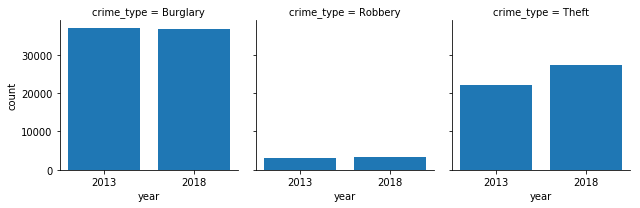

In [90]:
g = sns.FacetGrid(aggregated_df, col='crime_type')
g.map(plt.bar, 'year', 'count')

In [91]:
police_2013['sector'].value_counts().tail(1)

M    90347
Name: sector, dtype: int64

In [92]:
police_2018['sector'].value_counts().tail(1)

M    67204
Name: sector, dtype: int64

In [93]:
len(police_2013[police_2013['disposition_desc'].str.contains('DISREGARD', na=False)])/len(police_2013)

0.09051555555555556

In [94]:
len(police_2018[police_2018['disposition_desc'].str.contains('DISREGARD', na=False)])/len(police_2018)

0.1113949390022788